## Assignment2.Exercise3: Multivariate Logistic Regression

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Exe3.Question1. Read data and shuffle the rows

In [6]:
data = np.loadtxt('breast_cancer.csv' ,delimiter=',')

np.random.shuffle(data)

### Exe3.Question2. Replace the response 2 qnd 4 with 0 and 1

In [7]:
f = lambda x:1 if x[0]==4 else 0

data[:,9] = np.apply_along_axis(f,1,data[:,9].reshape(-1,1)) 

size = data.shape[0]
train, test = data[:int(0.70*size),:], data[int(0.70*size):,:]
# 70%  training and 30% testing

X = train[:,:9]
y=train[:,9]

Xtest = test[:,:9]
ytest=test[:,9]

The reason which I choose 70% and 30%:
Generally, k-fold cross validation; e.g. 10-fold cross validation, is the best.
Based on most of Literature reviews about this issue splitting the dataset; few training data causes that  parameter estimates will have greater variance, whereas with few test data, our performance statistic will have greater variance. Therefore, we need to have compromise about that.

#### Exe3.Question3. Normalize the Training data and Test data and Print the hyperparameters and Plot the Cost Function over iteration

In [8]:
def normalize(X):
    means = X.mean(axis=0)
    stds = X.std(axis=0)
    
    def normal_(x):
        return (x - means) / stds
    
    return normal_


func_normal=normalize(X)
normalX = func_normal(X)

In [9]:
Xe = np.c_[np.ones((normalX.shape[0],1)),normalX]

In [10]:
def logistic(x):
    return np.exp(x)/(1 + np.exp(x))


def CostFunc(theta, X, y):
  
    J = - (1 / X.shape[0]) * (np.log(logistic(X @ theta)).T @ y + np.log(1 - logistic(X @ theta)).T @ (1 - y))
   
    return J

def gradient_descent(X, y, theta,N, rate):
    costList = []
    for i in range(N):
        prediction = logistic(X@ theta)
        error = prediction - y
        costList.append(CostFunc(theta,X,y))
        theta = theta - (rate * (X.T @ error))

    return theta,costList

In [11]:
init_theta = np.zeros(Xe.shape[1])
niter=1000
rate = 0.0001

theta,costList = gradient_descent(Xe, y, theta=init_theta, N=niter, rate=rate)

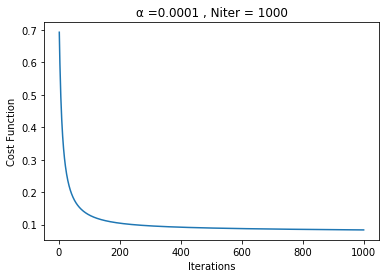

In [14]:
plt.plot(range(1, len(costList) + 1), costList)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('α ={} , Niter = {}'.format(rate,niter))
plt.show()

## Exe3.Question4: Training Error and Training accuracy

In [15]:
y_pred = logistic(Xe @ theta)
labels = y_pred >= 0.5


compare = (labels == (y==1))

ff = lambda x:1 if x[0]==True else 0

compare = np.apply_along_axis(ff,1,compare.reshape(-1,1)) 

In [17]:
correct = np.count_nonzero(compare)
non_correct = compare.shape[0] - correct
accuracy = correct / (correct+non_correct)

print("training error = {}".format(non_correct))

print("training accuracy = {}".format(accuracy))

training error = 15
training accuracy = 0.9686192468619247


## Exe3.Question5: Test Error and Test Accuracy

In [18]:
func_normal=normalize(Xtest)
normalXt = func_normal(Xtest)
Xte = np.c_[np.ones((normalXt.shape[0],1)),normalXt]

yt_pred = logistic(Xte @ theta)
labels_t = yt_pred >= 0.5

compare_t = (labels_t == (ytest==1))

compare_t = np.apply_along_axis(ff,1,compare_t.reshape(-1,1)) 

In [20]:
correct_t = np.count_nonzero(compare_t)
non_correct_t = compare_t.shape[0] - correct_t
accuracy_t = correct_t / (correct_t+non_correct_t)

print("test error = {}".format(non_correct_t))

print("test accuracy  = {}".format(accuracy_t))

test error = 5
test accuracy  = 0.975609756097561


## Exe3.Question6

the results with shuffling aren't the same when we repeat it. I don't think so, they would be the same even qualitatively, since with shuffling we are getting different train set and test set, therefore our model and Consequently, our prediction would not be the same. Also, It worth to mention that more training dataset have less error(more accuracy) in prediction in test set.